SVM row code

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [22]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64).reshape(-1, 1)

In [21]:
y.shape

(150, 1)

In [24]:
class linearSVC(BaseEstimator):
  def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
    self.C = C
    self.eta0 = eta0
    self.n_epochs = n_epochs
    self.random_state = random_state
    self.eta_d = eta_d
  
  def eta(self, epoch):
    return self.eta0 / (epoch + self.eta_d)
  
  def fit(self, X, y):
    if self.random_state:
      np.random.seed(self.random_state)
    w = np.random.randn(X.shape[1], 1)
    b = 0

    m = len(X)
    t = y * 2 - 1 #-1 if t==0, +1 if t==1
    # 1 - t*(wx +b)
    # 1 - tx * w - t*b
    X_t = X * t
    self.Js=[]

    for epoch in range(self.n_epochs):
      support_vectors_idx = (X_t.dot(w) +t*b<1).ravel()
      X_t_sv = X_t[support_vectors_idx]
      t_sv = t[support_vectors_idx]
      J = 1/2 * np.sum(w*w) + self.C * (np.sum(1-X_t_sv.dot(w))-b*np.sum(t_sv))

      self.Js.append(J)
      w_gradient_vector = w - self.C*np.sum(X_t_sv, axis=0).reshape(-1, 1)
      b_derivative = -C * np.sum(t_sv)

      w = w - self.eta(epoch) * w_gradient_vector
      b = b - self.eta(epoch) * b_derivative
    
    self.intercept_ = np.array([b])
    self.coef_ = np.array([w])
    support_vectors_idx = (X_t.dot(w) + t*b<1).ravel()
    self.support_vectors_ = X[support_vectors_idx]
    return self

  def decision_function(self, X):
    return X.dot(self.coef_[0]) + self.intercept_[0]
  def predict(self, X):
    return (self.decision_function(X) >= 0).astype(np.float64)

In [26]:
C = 2
svm_clf = linearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

(0.0, 60000.0, 0.0, 100.0)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


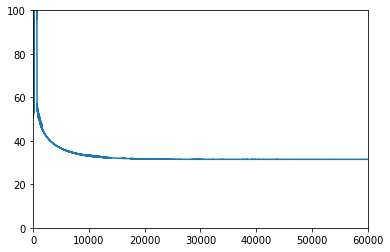

In [29]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js) 
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [30]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]
